In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import re 

RESULT_PATH = "../results"
FIGURE_PATH = os.path.join(RESULT_PATH,'figures')


In [17]:
RESULT_PATH = "../results"
        

file_ = open(os.path.join(RESULT_PATH,"simulation_false_positive_rate (2).txt"))
data_string = file_.read()
lines = data_string.split("\n")
new_lines = []
for line in lines:
    if line.startswith(" "):
        new_lines[-1] +=line
    else:
        new_lines.append(line)

In [23]:
new_lines[0]

'1,CIM,Change in Mean,0.00024130299971147906,2,[0, 200]'

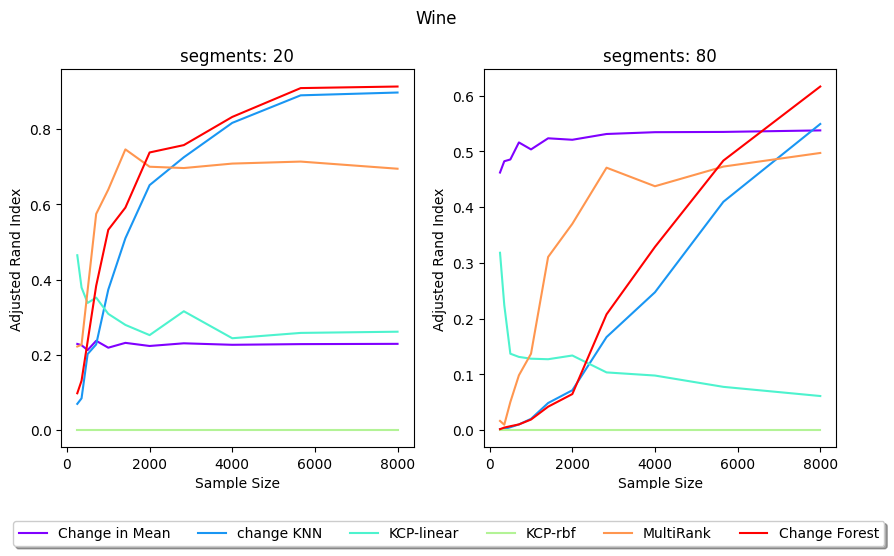

In [8]:
seed =[]
predicted_cpts = []
dataset_names = []
method_names = []
num_cpt = []
for line in new_lines:
    if line=="":
        break
    else:
        temp = line.split(",[")
        cpts = temp[-1]
        temp = temp[0].split(",")
        dataset_names.append(temp[1])
        method_names.append(temp[2])
        seed.append(temp[0])
        num_cpt.append()
        orginal_cpts.append(list(map(float,re.findall(r'\d+(?:\.\d+)?',cpts[0]))))
        predicted_cpts.append(list(map(float,re.findall(r'\d+(?:\.\d+)?',cpts[1])[1:-1])))

method_names = np.array(method_names)
dataset_names = np.array(dataset_names)

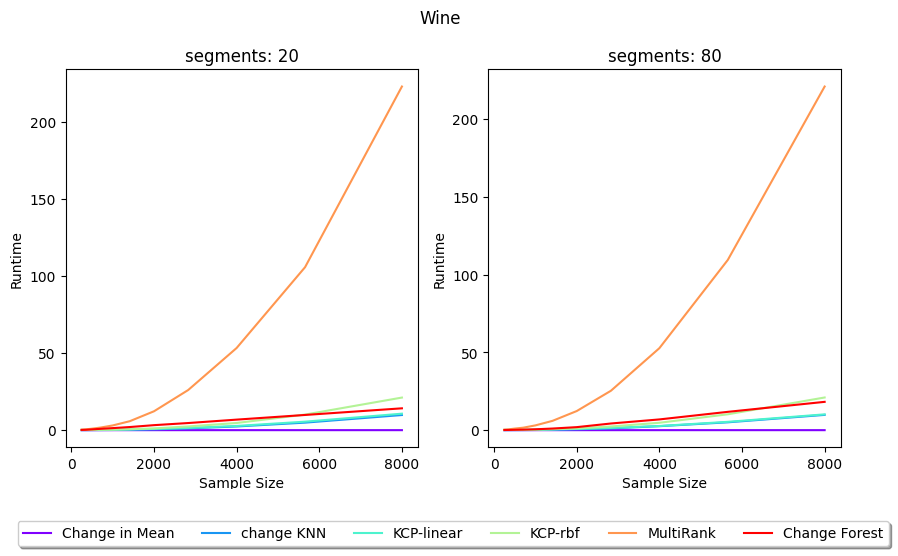